In [1]:
import os
os.environ['AEON_DEPRECATION_WARNING'] = 'False'

import os
import numpy as np
import pandas as pd
# pd.set_option('display.max_rows', 100)

import fnmatch

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from scipy import stats

import sys
sys.path.append("../")

from aeon.visualisation import plot_critical_difference

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
path = "TLB_logs/"
files = [
    #"tlb_all_sofa_bench_16_2-07-11-24-no_norm.csv",
    "tlb_all_sofa_bench_16_4-07-11-24-no_norm.csv",
    "tlb_all_sofa_bench_16_8-07-11-24-no_norm.csv",
    "tlb_all_sofa_bench_16_16-07-11-24-no_norm.csv",
    "tlb_all_sofa_bench_16_32-07-11-24-no_norm.csv",
    "tlb_all_sofa_bench_16_64-07-11-24-no_norm.csv",
    "tlb_all_sofa_bench_16_128-07-11-24-no_norm.csv",
    "tlb_all_sofa_bench_16_256-07-11-24-no_norm.csv"
]

configs = [4, 8, 16, 32, 64, 128, 256] #2, 
df_all = pd.DataFrame()
for i, file in enumerate(files):
    df = pd.read_csv(path + file)
    
    mapping = {"sfa_equi-depth_False": "SFA ED", # + str(configs[i]),
               "sfa_equi-depth_True": "SFA ED +VAR", # + str(configs[i]),
               "sfa_equi-width_False": "SFA EW", # + str(configs[i]),
               "sfa_equi-width_True": "SFA EW +VAR", # + str(configs[i]),
               "isax": "iSAX",
               }
    
    for key in mapping:
        df.Method = df.Method.replace({key: mapping[key]})
    
    df["Config"] = configs[i]    
    df_all = pd.concat([df_all, df])        

df = df_all
df = df.infer_objects()
display(df)

,Method,Dataset,TLB,Config
0,iSAX,ASTRO,0.235188,4
1,SFA EW +VAR,ASTRO,0.246748,4
2,SFA EW,ASTRO,0.246748,4
3,SFA ED +VAR,ASTRO,0.304445,4
4,SFA ED,ASTRO,0.304445,4
...,...,...,...,...
80,iSAX,TXED,0.356967,256
81,SFA EW +VAR,TXED,0.435282,256
82,SFA EW,TXED,0.382201,256
83,SFA ED +VAR,TXED,0.431805,256


In [3]:
# ASAX !
path = "TLB_logs/"

files = [
    "tlb_all_ASAX_sofa_bench_16_4-30-01-25.csv",
    "tlb_all_ASAX_sofa_bench_16_8-30-01-25.csv",
    "tlb_all_ASAX_sofa_bench_16_16-30-01-25.csv",
    "tlb_all_ASAX_sofa_bench_16_32-30-01-25.csv",
    "tlb_all_ASAX_sofa_bench_16_64-30-01-25.csv",
    "tlb_all_ASAX_sofa_bench_16_128-30-01-25.csv",
    "tlb_all_ASAX_sofa_bench_16_256-30-01-25.csv"
]

for i, file in enumerate(files):
    df = pd.read_csv(path + file)    
    df["Config"] = configs[i]    
    df_all = pd.concat([df_all, df])        

df = df_all
df = df.infer_objects()
display(df)

,Method,Dataset,TLB,Config
0,iSAX,ASTRO,0.235188,4
1,SFA EW +VAR,ASTRO,0.246748,4
2,SFA EW,ASTRO,0.246748,4
3,SFA ED +VAR,ASTRO,0.304445,4
4,SFA ED,ASTRO,0.304445,4
...,...,...,...,...
12,ASAX,OBST2024,0.278728,256
13,ASAX,PNW,0.480169,256
14,ASAX,Meier2019JGR,0.777094,256
15,ASAX,STEAD,0.435580,256


In [4]:
# SAX-TD!
path = "TLB_logs/"

files = [
    "tlb_all_SAX_TD_sofa_bench_16_4-30-01-25.csv",
    "tlb_all_SAX_TD_sofa_bench_16_8-30-01-25.csv",
    "tlb_all_SAX_TD_sofa_bench_16_16-30-01-25.csv",
    "tlb_all_SAX_TD_sofa_bench_16_32-30-01-25.csv",
    "tlb_all_SAX_TD_sofa_bench_16_64-30-01-25.csv",
    "tlb_all_SAX_TD_sofa_bench_16_128-30-01-25.csv",
    "tlb_all_SAX_TD_sofa_bench_16_256-30-01-25.csv"
]

for i, file in enumerate(files):
    df = pd.read_csv(path + file)    
    df["Config"] = configs[i]    
    df_all = pd.concat([df_all, df])        

df = df_all
df = df.infer_objects()
display(df)

,Method,Dataset,TLB,Config
0,iSAX,ASTRO,0.235188,4
1,SFA EW +VAR,ASTRO,0.246748,4
2,SFA EW,ASTRO,0.246748,4
3,SFA ED +VAR,ASTRO,0.304445,4
4,SFA ED,ASTRO,0.304445,4
...,...,...,...,...
12,SAX-TD,OBST2024,0.267767,256
13,SAX-TD,PNW,0.409474,256
14,SAX-TD,Meier2019JGR,0.528801,256
15,SAX-TD,STEAD,0.329921,256


In [5]:
df = df.sort_values(by=["Dataset", "Config"])

df_normed = df.groupby(["Dataset", "Config"]) \
            .apply(lambda l: l["TLB"] / (l["TLB"].iloc[0])).reset_index()
    
#df_factor = df.groupby(["Dataset", "Config"]) \
#            .apply(lambda l: (l["TLB"].iloc[0]) / l["TLB"]).reset_index()

display(df_normed)
df2 = df.copy().reset_index(drop=True)
df2["factor"] = df_normed["TLB"]

df_sub = df2.reset_index()[(df2.Method == "SFA Equi-Depth +Variance") & (df2.Config==4)].sort_values("factor",ascending=False)
display(df_sub)
# sns.lineplot(x="Dataset", y="factor", hue="Method", data=df_sub, sort=True)

,Dataset,Config,level_2,TLB
0,ASTRO,4,0,1.000000
1,ASTRO,4,1,1.049154
2,ASTRO,4,2,1.049154
3,ASTRO,4,3,1.294474
4,ASTRO,4,4,1.294474
...,...,...,...,...
828,TXED,256,82,1.070689
829,TXED,256,83,1.209649
830,TXED,256,84,1.067078
831,TXED,256,16,0.936026


,index,Method,Dataset,TLB,Config,factor


In [6]:
df[["Method", "TLB", "Config"]] \
        .groupby(["Method", "Config"]).median() \
        .sort_values(by=["Config", "Method"], ascending=True)

,,TLB
Method,Config,
ASAX,4,0.233420
SAX-TD,4,0.148424
SFA ED,4,0.314400
SFA ED +VAR,4,0.411296
SFA EW,4,0.316292
SFA EW +VAR,4,0.367351
iSAX,4,0.364952
ASAX,8,0.351508
SAX-TD,8,0.216777


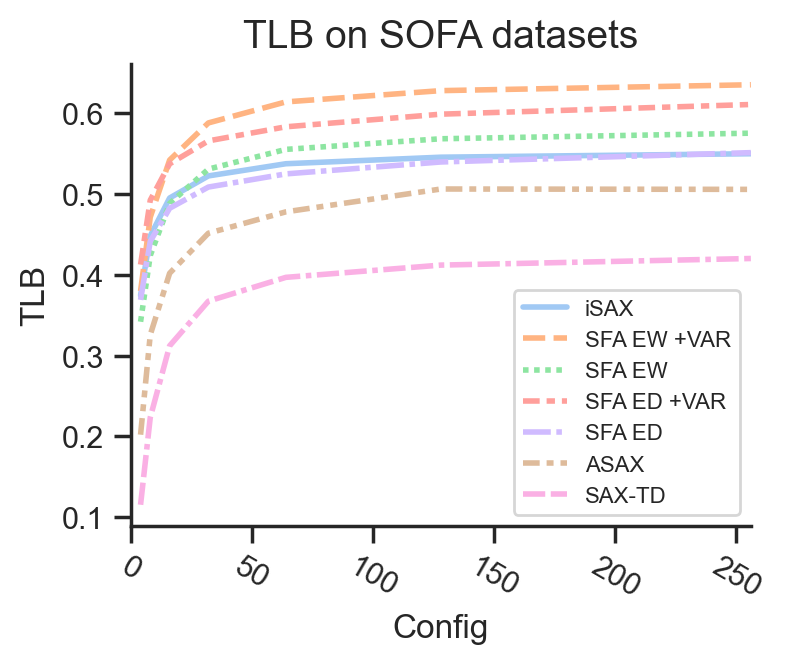

In [7]:
sns.set_theme(style="ticks", palette="pastel")

fig, ax = plt.subplots(figsize=(4,3))
ax = sns.lineplot(
    x="Config", y="TLB", hue="Method", style="Method",  
    data=df, err_style="bars", errorbar=("se", 0), 
    lw=2, ax = ax

)
ax.set_title("TLB on SOFA datasets", fontsize=14)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=-30)
ax.set_xlim([0,256])
sns.despine()
plt.legend(fontsize=8)
# sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# plt.show()
# plt.tight_layout()
plt.savefig("images/tlb_sofa_lineplot.pdf", bbox_inches='tight')


In [8]:
#df[["Config", "Method", "TLB"]] \
#        .groupby(["Config", "Method"]).median() \
#        .sort_values(by=["Config", "TLB"], ascending=False).reset_index()[["Config", "Method"]]

In [16]:
df_sub = df[df.Method.isin(["SFA EW +VAR", "SFA ED +VAR", "iSAX", "ASAX", "SAX-TD"])]
result = df_sub[["Config", "Method", "TLB"]] \
        .groupby(["Config", "Method"]).mean() \
        .pivot_table(columns="Config", index="Method")

result

TLB                                                    \
Config            4         8         16        32        64        128   
Method                                                                    
ASAX         0.202188  0.325701  0.401953  0.451489  0.477923  0.506181   
SAX-TD       0.115502  0.223434  0.312145  0.367408  0.396860  0.412031   
SFA ED +VAR  0.412623  0.492358  0.537329  0.565736  0.583148  0.598776   
SFA EW +VAR  0.379868  0.471289  0.541996  0.587946  0.613962  0.627885   
iSAX         0.374509  0.448093  0.495039  0.522359  0.537441  0.545546   

                       
Config            256  
Method                 
ASAX         0.505720  
SAX-TD       0.420192  
SFA ED +VAR  0.610740  
SFA EW +VAR  0.635172  
iSAX         0.549807

In [17]:
print(result.to_markdown())

| Method      |   ('TLB', 4) |   ('TLB', 8) |   ('TLB', 16) |   ('TLB', 32) |   ('TLB', 64) |   ('TLB', 128) |   ('TLB', 256) |
|:------------|-------------:|-------------:|--------------:|--------------:|--------------:|---------------:|---------------:|
| ASAX        |     0.202188 |     0.325701 |      0.401953 |      0.451489 |      0.477923 |       0.506181 |       0.50572  |
| SAX-TD      |     0.115502 |     0.223434 |      0.312145 |      0.367408 |      0.39686  |       0.412031 |       0.420192 |
| SFA ED +VAR |     0.412623 |     0.492358 |      0.537329 |      0.565736 |      0.583148 |       0.598776 |       0.61074  |
| SFA EW +VAR |     0.379868 |     0.471289 |      0.541996 |      0.587946 |      0.613962 |       0.627885 |       0.635172 |
| iSAX        |     0.374509 |     0.448093 |      0.495039 |      0.522359 |      0.537441 |       0.545546 |       0.549807 |


In [18]:
print(result.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} & \multicolumn{7}{l}{TLB} \\
Config &       4   &       8   &       16  &       32  &       64  &       128 &       256 \\
Method      &           &           &           &           &           &           &           \\
\midrule
ASAX        &  0.202188 &  0.325701 &  0.401953 &  0.451489 &  0.477923 &  0.506181 &  0.505720 \\
SAX-TD      &  0.115502 &  0.223434 &  0.312145 &  0.367408 &  0.396860 &  0.412031 &  0.420192 \\
SFA ED +VAR &  0.412623 &  0.492358 &  0.537329 &  0.565736 &  0.583148 &  0.598776 &  0.610740 \\
SFA EW +VAR &  0.379868 &  0.471289 &  0.541996 &  0.587946 &  0.613962 &  0.627885 &  0.635172 \\
iSAX        &  0.374509 &  0.448093 &  0.495039 &  0.522359 &  0.537441 &  0.545546 &  0.549807 \\
\bottomrule
\end{tabular}



/var/folders/4l/py9g67fx10n68s69g0w8sghr0000gn/T/ipykernel_43860/829127250.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(result.to_latex())


/Users/bzcschae/miniconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


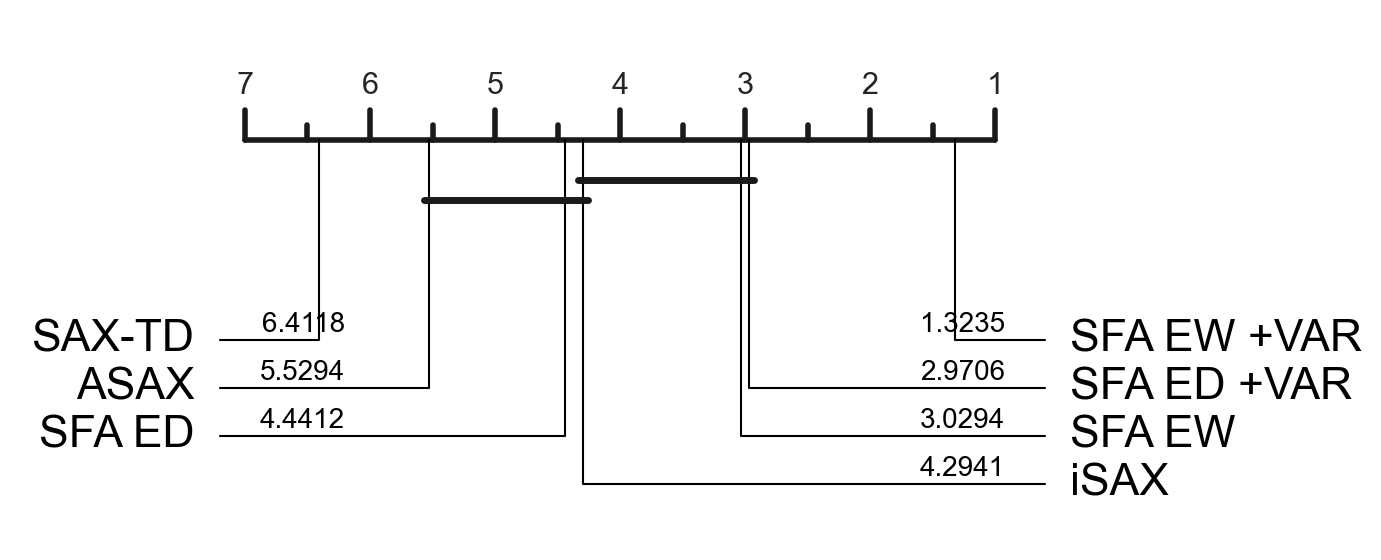

In [12]:
df_pivot = df[df.Config==256].pivot(index='Dataset', columns='Method', values='TLB')
ax = plot_critical_difference(
    scores=df_pivot.to_numpy(),
    labels=df_pivot.columns.to_numpy(),
    #errors=False,
    #clique_method="holm",
    alpha=0.05,
)
#plt.tight_layout()
plt.savefig("images/tlb_SOFA_cd_diagramm.pdf", bbox_inches='tight')

In [13]:
"""
df_test = result.reset_index()

sfa_ed = df_test[df_test.Method == "SFA ED +VAR"].values[0, 1:]
isax = df_test[df_test.Method == "iSAX"].values[0, 1:]

print(sfa_ed)
print(isax)

relation = sfa_ed / isax 

print(relation-1)
"""

'\ndf_test = result.reset_index()\n\nsfa_ed = df_test[df_test.Method == "SFA ED +VAR"].values[0, 1:]\nisax = df_test[df_test.Method == "iSAX"].values[0, 1:]\n\nprint(sfa_ed)\nprint(isax)\n\nrelation = sfa_ed / isax \n\nprint(relation-1)\n'

In [14]:
df_pivot

Method,ASAX,SAX-TD,SFA ED,SFA ED +VAR,SFA EW,SFA EW +VAR,iSAX
Dataset,,,,,,,
ASTRO,0.315253,0.288998,0.418825,0.418825,0.418999,0.418999,0.377254
BIGANN,0.034042,0.191468,0.375728,0.493163,0.375015,0.493266,0.184142
DEPP1B,0.381711,0.383155,0.373150,0.410161,0.373428,0.410529,0.359132
ETHZ,0.678370,0.517921,0.714351,0.715392,0.716198,0.717116,0.719380
ISC_EHB_DepthPhases,0.891546,0.638030,0.928751,0.932102,0.930155,0.933444,0.930560
Iquique,0.503857,0.434957,0.631796,0.631950,0.635442,0.635555,0.617899
LenDB,0.582062,0.551295,0.551740,0.551740,0.847305,0.847305,0.829278
Meier2019JGR,0.777094,0.528801,0.790271,0.785795,0.877537,0.874745,0.820503
NEIC,0.694743,0.519575,0.747767,0.748695,0.750809,0.751722,0.741987
